In [42]:
include("./MD_LJ.jl")

0.0 0.0 1.2566370614359172
0.025 0.0 3.7699111843077526
0.05 0.0 6.283185307179588
0.07500000000000001 0.0 8.796459430051423
0.1 0.0 11.309733552923252
0.125 0.0 13.823007675795086
0.15 0.0 16.336281798666917
0.175 0.0 18.849555921538755
0.19999999999999998 0.0 21.362830044410583
0.22499999999999998 0.0 23.87610416728242
0.24999999999999997 0.0 26.38937829015426
0.27499999999999997 0.0 28.902652413026125
0.3 0.0 31.41592653589796
0.325 0.0 33.929200658769794
0.35000000000000003 0.0 36.442474781641664
0.37500000000000006 0.0 38.95574890451344
0.4000000000000001 0.0 41.46902302738533
0.4250000000000001 0.0 43.98229715025711
0.4500000000000001 0.0 46.495571273129
0.47500000000000014 0.0 49.00884539600074
0.5000000000000001 0.0 51.52211951887263
0.5250000000000001 0.0 54.03539364174452
0.5500000000000002 0.0 56.54866776461641
0.5750000000000002 0.0 59.061941887488196
0.6000000000000002 0.0 61.575216010359966
0.6250000000000002 0.0 64.08849013323186
0.6500000000000002 0.0 66.60176425610365


Main.MD_LJ

In [43]:
lattice = MD_LJ.SquareLattice(9,9, 64,1.0)

initial_positions, initial_velocities = lattice.positions, lattice.velocities
println("Initial Positions:")

display(initial_positions)
println("Initial Velocities:")
display(initial_velocities)

println(typeof(initial_positions))
println(typeof(initial_velocities))

64-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0, 2.0]
 [1.0, 3.0]
 [1.0, 4.0]
 [1.0, 5.0]
 [1.0, 6.0]
 [1.0, 7.0]
 [1.0, 8.0]
 [2.0, 1.0]
 [2.0, 2.0]
 ⋮
 [7.0, 8.0]
 [8.0, 1.0]
 [8.0, 2.0]
 [8.0, 3.0]
 [8.0, 4.0]
 [8.0, 5.0]
 [8.0, 6.0]
 [8.0, 7.0]
 [8.0, 8.0]

64×2 Matrix{Float64}:
 -0.303297    -0.0356689
  1.28354     -1.32281
  0.334033     0.816053
 -3.87118      1.31082
  0.180709    -0.542822
  0.0797826    1.33329
 -0.00793145  -1.47381
  0.0641206    0.198252
 -2.01421     -1.03863
  0.510859    -0.191552
  ⋮           
  0.0858982   -1.68235
  0.562886    -0.589027
  0.066038     1.15054
 -0.611716    -0.130359
 -0.248045    -0.633806
  0.577749    -0.176004
 -0.307631    -1.81538
  0.142584     1.17962
  0.071209     0.052671

Total Linear Momentum: [0.0 0.0]
Initial Positions:
Initial Velocities:
Vector{Vector{Float64}}
Matrix{Float64}


In [44]:
N = 64
Lx = 9
Ly = 9
L = Lx
tau = 0.01
steps = 200
total_steps = 200

# Generate initial positions and velocities
lattice = MD_LJ.SquareLattice(9, 9, 64, 1.0)
rcut = 2.5
fc = 24 * (2 * (1 / rcut)^12 - (1 / rcut)^6) / rcut
Vc = 4 * ((1 / rcut)^12 - (1 / rcut)^6)
positions, velocities = lattice.positions, lattice.velocities
kinetic_energy, potential_energy = MD_LJ.calculate_energy(positions, velocities, L, Vc, fc, rcut)
forces = MD_LJ.calculate_forces(positions, L, fc)

Total Linear Momentum: [0.0 0.0]


64-element Vector{Any}:
 (23.2284230519808, 23.228423051980805)
 (22.180208129433602, 24.210781904433603)
 (22.181422006886404, 24.325352581886403)
 (22.181422006886404, 24.325352581886403)
 (22.181422006886404, 24.325352581886403)
 (22.181422006886404, 24.325352581886403)
 (22.141208651980804, 24.504565451980802)
 (23.110210742169603, 1.5491387421695992)
 (22.8932122720752, 23.188209697075205)
 (21.7304266720752, 24.093783472075202)
 ⋮
 (22.9542128323584, 1.3175696323583992)
 (0.11699843235840003, 24.116998432358404)
 (0.07799895490560002, 23.896358329905603)
 (0.07799895490560002, 23.896358329905603)
 (0.07799895490560002, 23.896358329905603)
 (0.07799895490560002, 23.896358329905603)
 (0.07799895490560002, 23.896358329905603)
 (0.03899947745280001, 24.0389994774528)
 (0.0, 0.0)

In [45]:
new_positions, new_velocities, new_forces = MD_LJ.verlet_integration!(positions, velocities, forces, L, tau,fc)

([[1.0006103510081694, 1.0005400290874975], [1.0057987159990092, 1.982259198646711], [1.0150717816293577, 3.016737075598326], [1.001358211301479, 3.987449952711372], [0.9966827990603413, 4.978998376259379], [0.9831639888783992, 5.991862208628412], [0.9955752342088126, 7.002636763631891], [0.9992696012292153, 8.012707250787273], [2.000219788892125, 0.9984018257925581], [2.003745664428272, 2.0020884221188995]  …  [-2.0173146748785467, -1.9997823324130124], [-2.000543495454675, -1.0068629632072632], [-0.988233144820045, 0.9981252640653961], [-0.9887477369257187, 2.0057048441656935], [-0.9918244194492818, 3.012558404324748], [-0.9911416143164136, 4.000258971271747], [-1.0110201890948867, -4.010797530307092], [-0.9797163426530258, -2.987698878901523], [-1.0122949252985585, -1.9822247102844202], [-1.0058110951295447, -0.9937941647056316]], [0.17908279799573157 0.2185332928427817; 0.6954922343583367 -1.7103455644885042; … ; -1.2283204522979534 1.9266754160066155; -0.5811095129544599 0.6205835

In [48]:
positions_final, velocities_final = MD_LJ.md_simulation(positions, velocities, L, tau, steps, 10, 1000, fc, Vc, rcut)

kinetic_energy_final, potential_energy_final = MD_LJ.calculate_energy(positions_final, velocities_final, Lx, Vc, fc, rcut)
total_energy_final = kinetic_energy_final + potential_energy_final
temperature_final = (2 / (3 * N)) * kinetic_energy_final

println("Equilibrium reached in steps.")
println("Kinetic Energy: $kinetic_energy_final")
println("Potential Energy: $potential_energy_final")
println("Total Energy: $total_energy_final")
println("Temperature: $temperature_final")


Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 10: Mean Temperature = 8.419881896018464e18, Mean Pressure = -1.9089268326942317e27
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 20: Mean Temperature = 8.455231395663844e25, Mean Pressure = -4.582799460615976e31
Step 21
Step 22


Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 30: Mean Temperature = 5.84952626804049e44, Mean Pressure = 2.8053552951061396e46
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
Step 39
Step 40
Step 40: Mean Temperature = 1.3763591218918805e45, Mean Pressure = 1.386661390361221e50
Step 41
Step 42
Step 43
Step 44
Step 45
Step 46
Step 47
Step 48
Step 49
Step 50
Step 50: Mean Temperature = 1.3763591218918805e45, Mean Pressure = 3.557629560989947e47
Step 51
Step 52
Step 53
Step 54
Step 55
Step 56
Step 57
Step 58
Step 59
Step 60
Step 60: Mean Temperature = 1.3763591218918805e45, Mean Pressure = 9.56476401952667e44
Step 61
Step 62
Step 63
Step 64
Step 65
Step 66
Step 67
Step 68
Step 69
Step 70
Step 70: Mean Temperature = 1.3763591218918805e45, Mean Pressure = 6.775241603842465e48
Step 71
Step 72


Step 73
Step 74
Step 75
Step 76
Step 77
Step 78
Step 79
Step 80
Step 80: Mean Temperature = 1.3763591251883976e45, Mean Pressure = -1.4042877284159067e62
Step 81
Step 82
Step 83
Step 84
Step 85
Step 86
Step 87
Step 88
Step 89
Step 90
Step 90: Mean Temperature = 1.3763591264388006e45, Mean Pressure = 1.0874936307664595e45
Step 91
Step 92
Step 93
Step 94
Step 95
Step 96
Step 97
Step 98
Step 99
Step 100
Step 100: Mean Temperature = 1.3763591264388006e45, Mean Pressure = 1.0874936307664625e45
Step 101
Step 102
Step 103
Step 104
Step 105
Step 106
Step 107
Step 108
Step 109
Step 110
Step 110: Mean Temperature = 1.3763591264388006e45, Mean Pressure = 1.0874936307664657e45
Step 111
Step 112
Step 113
Step 114
Step 115
Step 116
Step 117
Step 118
Step 119
Step 120
Step 120: Mean Temperature = 1.3763591264388006e45, Mean Pressure = 1.087493630766481e45
Step 121
Step 122
Step 123
Step 124


Step 125
Step 126
Step 127
Step 128
Step 129
Step 130
Step 130: Mean Temperature = 1.3763591264388006e45, Mean Pressure = 1.0874936307664595e45
Step 131
Step 132
Step 133
Step 134
Step 135
Step 136
Step 137
Step 138
Step 139
Step 140
Step 140: Mean Temperature = 1.3763591264388006e45, Mean Pressure = 1.0874936307664595e45
System is stable. Stability counter = 1
Step 141
Step 142
Step 143
Step 144
Step 145
Step 146
Step 147
Step 148
Step 149
Step 150
Step 150: Mean Temperature = 1.3763591264388006e45, Mean Pressure = 1.0874936307664595e45
System is stable. Stability counter = 2
Step 151
Step 152
Step 153
Step 154
Step 155
Step 156
Step 157
Step 158
Step 159
Step 160
Step 160: Mean Temperature = 1.3763591264388006e45, Mean Pressure = 1.0874936307664595e45
System is stable. Stability counter = 3
Step 161
Step 162
Step 163
Step 164
Step 165
Step 166
Step 167
Step 168
Step 169
Step 170
Step 170: Mean Temperature = 1.3763591264388006e45, Mean Pressure = 1.0874936307664595e45
System is stable

Step 180
Step 180: Mean Temperature = 1.3763591264388006e45, Mean Pressure = 1.0874936307664595e45
System is stable. Stability counter = 5
System has reached equilibrium. Stopping simulation.
Equilibrium reached in steps.
Kinetic Energy: 1.3213047613812484e47
Potential Energy: -9.695686791879478e10
Total Energy: 1.3213047613812484e47
Temperature: 1.3763591264388004e45


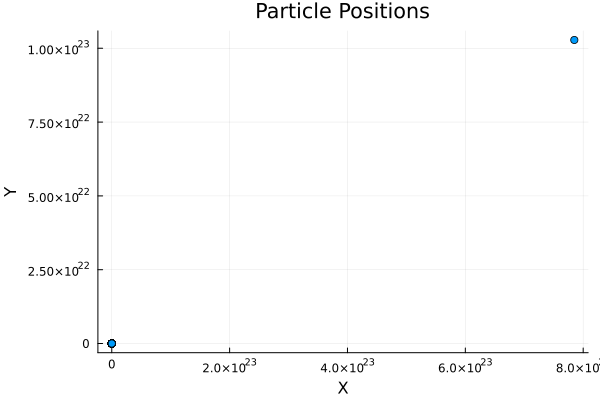

In [50]:
using Plots
scatter([pos[1] for pos in positions_final], [pos[2] for pos in positions_final], xlabel="X", ylabel="Y", title="Particle Positions", legend=false)


In [59]:
N = 64 
using LinearAlgebra
vx = randn(N)  
vy = randn(N) 
nbin = 32
dvel = 0.16
num_steps = 1000
m = 1.0  # Particle mass
kB = 1.0  # Boltzmann constant
T = 300.0  # Temperature

# Call the function to get the data
v_squared, prob, theoretical_prob ,v_values= MD_LJ.compute_equilibrium_prob(N, vx, vy, nbin, dvel, num_steps, m, kB, T)
println(" Probability:")
println(" ********************************")
# println(prob)
println(norm(prob.-theoretical_prob))
println(" ********************************")
# Plot the results
v_values = collect(0:dvel:(nbin - 1) * dvel)
plot(v_values, prob, xlabel="v", ylabel="P(v)", label="Simulation")
plot!(v_values, theoretical_prob, label="Maxwell-Boltzmann Distribution")

Lx = Ly = 10.0  
nbin = 1000 
gcum = zeros(Float64, nbin)  
ncorrel = 1000 
dr = 0.025 


MD_LJ.normalize_g(ncorrel, N, Lx, Ly, gcum, dr,nbin)
N=10
x = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]  
y = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
MD_LJ.compute_g(ncorrel, x, y, N, Lx, Ly, gcum, nbin, dr)

 Probability:
 ********************************
1.768586864615567
 ********************************
0.0 0.0 1.2566370614359172
0.025 0.0 3.7699111843077526
0.05 0.0 6.283185307179588
0.07500000000000001 0.0 8.796459430051423
0.1 0.0 11.309733552923252
0.125 0.0 13.823007675795086
0.15 0.0 16.336281798666917
0.175 0.0 18.849555921538755
0.19999999999999998 0.0 21.362830044410583
0.22499999999999998 0.0 23.87610416728242
0.24999999999999997 0.0 26.38937829015426
0.27499999999999997 0.0 28.902652413026125
0.3 0.0 31.41592653589796
0.325 0.0 33.929200658769794
0.35000000000000003 0.0 36.442474781641664
0.37500000000000006 0.0 38.95574890451344
0.4000000000000001 0.0 41.46902302738533
0.4250000000000001 0.0 43.98229715025711
0.4500000000000001 0.0 46.495571273129
0.47500000000000014 0.0 49.00884539600074
0.5000000000000001 0.0 51.52211951887263
0.5250000000000001 0.0 54.03539364174452
0.5500000000000002 0.0 56.54866776461641
0.5750000000000002 0.0 59.061941887488196
0.6000000000000002 0.0 6

1000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0